# **GD**

### Import numpy, matplotlib.pyplot and make it inline

In [226]:
import numpy as np
import matplotlib.pyplot as plt

### Read RegData csv file into numpy array (check your data)

In [227]:
my_data = np.genfromtxt('/content/sample_data/RegData.csv', delimiter=',')

### Explore your data

In [228]:
print(my_data)
print(my_data.shape)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]
(13, 2)


### Define variables X and y. Assign first column data to X and second column to y
### Note: X is the independent variable (input to LR model) and y is the dependent variable (output)

In [229]:
y = my_data[:,1].reshape((13,1))
x = my_data[:,0].reshape((13,1))
print(y)
print(y.shape)
print(x)
print(x.shape)

[[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]
(13, 1)
[[2.9000001 ]
 [6.69999981]
 [4.9000001 ]
 [7.9000001 ]
 [9.80000019]
 [6.9000001 ]
 [6.0999999 ]
 [6.19999981]
 [6.        ]
 [5.0999999 ]
 [4.69999981]
 [4.4000001 ]
 [5.80000019]]
(13, 1)


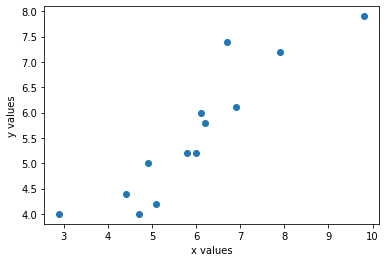

In [230]:
_ = plt.scatter(x,y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')

In [231]:
x = np.concatenate((np.ones((x.shape[0],1)),x),axis=1)
print(x)
print(x.shape)

[[1.         2.9000001 ]
 [1.         6.69999981]
 [1.         4.9000001 ]
 [1.         7.9000001 ]
 [1.         9.80000019]
 [1.         6.9000001 ]
 [1.         6.0999999 ]
 [1.         6.19999981]
 [1.         6.        ]
 [1.         5.0999999 ]
 [1.         4.69999981]
 [1.         4.4000001 ]
 [1.         5.80000019]]
(13, 2)


In [232]:
#inializing theta
theta = np.zeros((1,x.shape[1]))
print(theta)
print(theta.shape)

[[0. 0.]]
(1, 2)


In [233]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [234]:
def grad (x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta.T
    # x(13,2) - h(13,1) = g(13,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    return grad.T

In [235]:
def BGD (x, y, theta_min, it, alpha):
    thetas = [theta_min]            # a list of thetas (list of arrays (1,2))
    error = [cost(x, y, theta_min)]  # a list of output of cost function (list of values)
    for i in range(it):
        if (i > 0 and abs(error[-1]- error[-2])<= 1e-10):
            print(f"converges after {i} iterations")
            break
        theta_min = theta_min - alpha * grad(x, y, theta_min)
        error.append(cost(x, y, theta_min))
        thetas.append(theta_min)
    return thetas, theta_min, error

In [242]:
it = 100000
alpha = 0.000001
thetas, theta_min, err= BGD (x, y, theta, it, alpha) 
print(theta_min)
print(len(err))
print(len(thetas))

[[0.14630432 0.87738596]]
100001
100001


In [243]:
print(np.array(thetas).shape)
print(np.squeeze(np.array(thetas)).shape)
# theta0 , theta1
print(np.squeeze(np.array(thetas)))

(100001, 1, 2)
(100001, 2)
[[0.00000000e+00 0.00000000e+00]
 [5.56923074e-06 3.50438460e-05]
 [1.11382473e-05 7.00863215e-05]
 ...
 [1.46303920e-01 8.77384585e-01]
 [1.46304119e-01 8.77385274e-01]
 [1.46304318e-01 8.77385963e-01]]


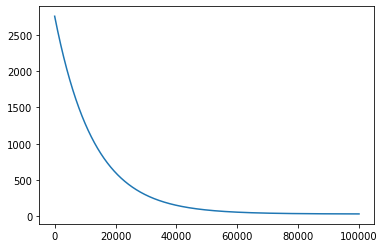

In [244]:
plt.plot(range(len(err)),err)  #range(len(cost)) is the number of iterations 

In [245]:
f = x @ theta_min.T
print(np.concatenate((f,y),axis=1))

[[2.69072369 4.        ]
 [6.0247901  7.4000001 ]
 [4.44549562 5.        ]
 [7.07765351 7.19999981]
 [8.74468692 7.9000001 ]
 [6.20026755 6.0999999 ]
 [5.49835861 6.        ]
 [5.58609712 5.80000019]
 [5.4106201  5.19999981]
 [4.62097265 4.19999981]
 [4.27001818 4.        ]
 [4.00680264 4.4000001 ]
 [5.23514307 5.19999981]]


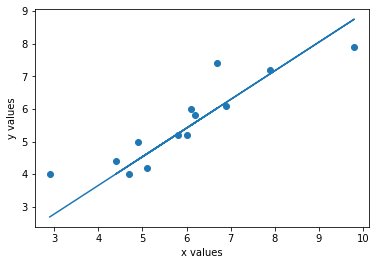

In [246]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

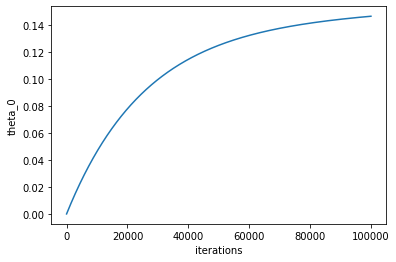

In [247]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(err)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

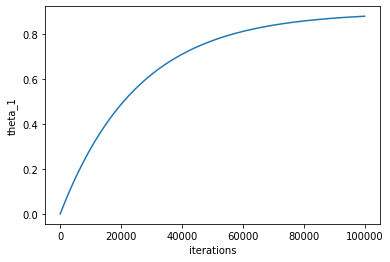

In [248]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(err)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

In [249]:
from sklearn.metrics import r2_score
# print(theta.T)
# print(x)
f = x @ theta_min.T
print(r2_score(y , f))
# print(y)
# print(f)

0.7395210908455189


# **BFGS**

In [251]:
#inializing theta
theta = np.zeros((2,1))
print(theta)
print(theta.shape)

[[0.]
 [0.]]
(2, 1)


In [252]:
len(theta)

2

In [253]:
np.eye(2) 

array([[1., 0.],
       [0., 1.]])

In [254]:
I = np.ones((13, 1))
I

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [255]:
# cost function
def cost(x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta
    error = ((h_x - y).T @ (h_x - y))/2*x.shape[0]
    return error[0,0]

In [256]:
def grad (x, y, theta):
    # x(13,2) . theta(1,2) = h(13,1)
    h_x = x @ theta
    # x(13,2) . h(13,1) = g(2,1)
    grad = x.T @ (h_x - y) / x.shape[0]
    # g(2,1)
    return grad

In [257]:
#choose the value of a 
def line_search(y, x, theta_min, pk, grd, max_it):
    '''
    BACKTRACK LINE SEARCH WITH WOLFE CONDITIONS
    values of the parameters are chosen due to the WOLFE condition 
    in the Numerical Optimization book
    '''
    #p(2,1) , theta_min(2,1), grd(2,1)
    # it = 0
    I = np.ones((13, 1))
    a = 1
    c1 = 1e-4 
    c2 = 0.9 
    theta_min_new = theta_min + a * pk
    f_x_new = x @ theta_min_new
    f_x = x @ theta_min
    grd_new = grad(x, y, theta_min_new)
    # print(h_x_new.shape)
    # print(h_x_old.shape)
    # print(grd.shape)
    # print(p.shape)
    # print(((c1 * a * grd @ p) * I).shape)
    # print(h_x_new.shape)
    # h_x_new(13,1), h_x_old(13,1), (c1 * a * grd @ p) (const) or grd_new(1,2), p(2,1), c2 * grd @ p (const)
    while f_x_new.all() <= (f_x + (c1 * a * grd.T @ pk) * I).all() or grd_new.T @ pk >= c2 * grd.T @ pk : 
        a *= 0.5
        theta_min_new = theta_min + a * pk
        f_x_new = x @ theta_min_new
        f_x = x @ theta_min
        grd_new = grad(x, y, theta_min_new)
        # it+=1
        # if it > max_it: 
        #     print('Maximum iterations reached!')
        #     break
    print(a)
    return a

In [258]:
def BFGS(x, y, theta_min, max_it):
    '''
    DESCRIPTION
    BFGS Quasi-Newton Method, implemented as described in Nocedal:
    Numerical Optimisation.

    INPUTS:
    y:           function to be optimised 
    x0:          intial guess
    max_it:      maximum iterations 
    theta_min:   the initial value of theta

    OUTPUTS: 
    thetas:      the history of thetas
    theta_min:   the optimal solution of the function y
    error:       the history of the error
    '''
    thetas = [theta_min]
    error = [cost(x, y, theta_min)]
    #theta_min(2,1)
    d = len(theta_min)                   # dimension of input
    grd = grad(x, y, theta_min)          # initial gradient 
    H = np.eye(d)                        # initial hessian
    it = 2 

    while np.linalg.norm(grd) > 1e-5:    # while gradient is positive
        if it > max_it: 
            print('Maximum iterations reached!')
            break
        it += 1
        #p(2,1) = H(2,2) . grd(2,1)
        pk = -H @ grd                                  # search direction (Newton Method) (the minimizer)

        #p(2,1) , theta_min(2,1), grd(2,1)
        # a = line_search(y, x, theta_min, pk, grd, max_it)      # line search (step length)

        # This iteration is quite
        # similar to the line searchNewton method; the key difference is that the approximateHessian
        # Bk is used in place of the true Hessian.
        theta_min = theta_min + .5**4 * pk

        # theta_min = theta_min + pk
        thetas.append(theta_min)
        error.append(cost(x, y, theta_min))
        
        # Instead of computing Bk afresh at every iteration, Davidon proposed to update it in a
        # simple manner to account for the curvature measured during the most recent step. Suppose
        # that we have generated a new iterate xk+1 and wish to construct a new quadratic model, of the form
        # mk+1(p) = fk+1 + deltafTk+1 * p + 1/2 * pT * Bk+1 * p.                     
        grd_new = grad(x, y, theta_min)

        # yk(2,1)
        yk = grd_new - grd
        # sk(2,1)
        sk = thetas[-1] - thetas[-2]

        rk = 1 / (yk.T @ sk)

        # the DFP updating formula Hk = Bk-1 
        # (2,2) @ (2,2) @ (2,2)
        H = (np.eye(d)-(rk * (sk @ yk.T))) @ H @ (np.eye(d)-(rk * (yk @ sk.T))) + (rk * (sk @ sk.T))
        
        grd = grd_new[:]
        
        #stopping condition
        if (it > 0 and abs(error[-1]- error[-2]) <= 1e-10):
            print(f"converges after {it} iterations")
            break
    return thetas, theta_min, error

In [259]:
it = 100
thetas, theta_min, err = BFGS(x, y, theta, it)
print(theta_min)
print(len(err))
print(len(thetas))

Maximum iterations reached!
[[1.4222813]
 [0.6987106]]
100
100


In [260]:
print(np.array(thetas).shape)
print(np.squeeze(np.array(thetas)).shape)
# theta0 , theta1
print(np.squeeze(np.array(thetas)))

(100, 2, 1)
(100, 2)
[[0.         0.        ]
 [0.34807692 2.19024038]
 [0.34083192 2.10849999]
 [0.33925632 2.03104422]
 [0.34263464 1.95766299]
 [0.35032101 1.88815536]
 [0.36173314 1.82232917]
 [0.37634673 1.76000078]
 [0.39369037 1.7009948 ]
 [0.41334085 1.64514375]
 [0.43491886 1.59228783]
 [0.45808505 1.5422746 ]
 [0.4825364  1.49495872]
 [0.50800293 1.45020168]
 [0.53424466 1.4078715 ]
 [0.56104879 1.36784251]
 [0.58822724 1.32999506]
 [0.61561423 1.2942153 ]
 [0.64306424 1.2603949 ]
 [0.67045    1.22843085]
 [0.69766074 1.19822521]
 [0.72460058 1.16968489]
 [0.75118703 1.14272144]
 [0.77734965 1.11725086]
 [0.80302883 1.09319335]
 [0.82817464 1.07047316]
 [0.85274586 1.04901841]
 [0.87670899 1.02876087]
 [0.90003748 1.00963581]
 [0.92271089 0.99158186]
 [0.94471424 0.97454081]
 [0.96603738 0.95845746]
 [0.98667442 0.94327953]
 [1.00662317 0.92895743]
 [1.02588474 0.91544421]
 [1.04446307 0.90269538]
 [1.06236458 0.89066881]
 [1.07959779 0.87932461]
 [1.09617307 0.868625  ]
 [1.

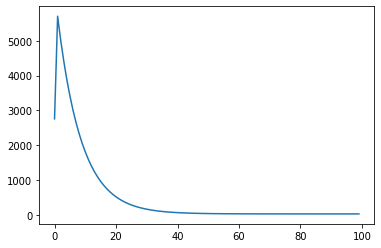

In [261]:
plt.plot(range(len(err)),err)  #range(len(cost)) is the number of iterations 

In [262]:
f = x @ theta_min
print(np.concatenate((f,y),axis=1))

[[3.44854211 4.        ]
 [6.10364221 7.4000001 ]
 [4.84596332 5.        ]
 [6.94209513 7.19999981]
 [8.26964535 7.9000001 ]
 [6.24338453 6.0999999 ]
 [5.68441591 6.        ]
 [5.75428691 5.80000019]
 [5.61454492 5.19999981]
 [4.98570531 4.19999981]
 [4.706221   4.        ]
 [4.49660802 4.4000001 ]
 [5.47480293 5.19999981]]


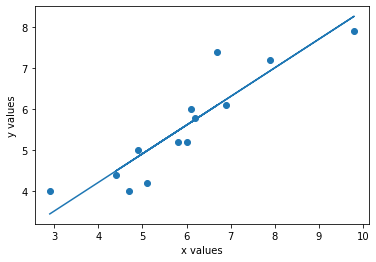

In [263]:
_ = plt.scatter(x[:,1],y)
_ = plt.xlabel('x values')
_ = plt.ylabel('y values')
_ = plt.plot(x[:,1],f)

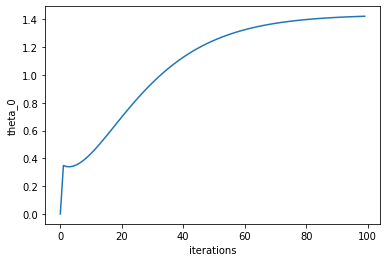

In [264]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(err)),thetas[:,0])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_0')

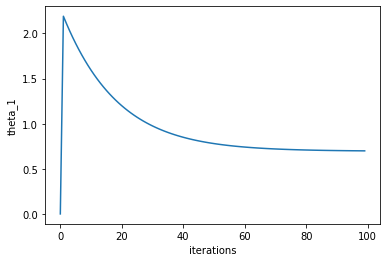

In [265]:
thetas = np.squeeze(np.array(thetas))
plt.plot(range(len(err)),thetas[:,1])
_ = plt.xlabel('iterations')
_ = plt.ylabel('theta_1')

In [266]:
from sklearn.metrics import r2_score
# print(theta.T)
# print(x)
f = x @ theta_min
print(r2_score(y , f))
# print(y)
# print(f)

0.8211788356210399


With 100 iteration only we reached 82.11 % acc more than 73.9 % acc with 100000 iteration

# **SKLearn**

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = x
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.8213156778363776